In [32]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
def gameMain(cop_mem, alive_mem, incr_per):
    global mafia_num, bystander_num, cop_num, medic_num
    
    alive_list=[] #생존자 리스트
    
    for bystander in range(bystander_num): #일반 시민=1
        alive_list.append(1)
    for medic in range(medic_num): #메딕=2
        alive_list.append(2)
    for cop in range(cop_num): #경찰=3
        alive_list.append(3)
    for mafia in range(mafia_num): #마피아=4
        alive_list.append(4)

    pick_per=[1 for i in range(len(alive_list))] 
    #낮에 죽을 사람을 고를 리스트
    #죽을 확률(가중치)은 모두 동일하게 시작(1)
    
    cop_check=[0 for i in range(len(alive_list))]
    #경찰이 해당 player를 조사했는지 안했는지 확인하기 위한 리스트
    #조사O = 1, 조사X = 0
    for player_type in range(len(alive_list)):
        if(alive_list[player_type]==3):
            cop_check[player_type]=1
            #경찰이 경찰을 조사할 일은 없으므로 1
    
    result=0 
    while(1): #낮과 밤을 반복하다 result가 0이 아니면 탈출 후 결과 내기
        result=stateCheck()
        if(result!=0):
            break
        day(alive_list, pick_per, cop_check, cop_mem, alive_mem)
        result=stateCheck()
        if(result!=0):
            break
        night(alive_list, pick_per, cop_check, cop_mem, incr_per)
        
    return result

In [34]:
def stateCheck(): #게임의 상태를 체크하는 함수(게임이 끝나야하는지 확인해줌)
    global mafia_num, bystander_num, cop_num, medic_num
    if(mafia_num==0):
        return 1
    elif(bystander_num+cop_num+medic_num<=mafia_num):
        return 2
    else:
        return 0

In [35]:
def day(alive_list, pick_per, cop_check, cop_mem, alive_mem): #낮에 일어나는 일들을 수행하는 함수
    global mafia_num, bystander_num, cop_num, medic_num
 
    killed=random.choices([i for i in range(len(pick_per))], weights=pick_per, k=1)[0] 
    #pick_per의 가중치를 고려하여 낮에 죽을 사람 랜덤 뽑기
    
    player_type=alive_list.pop(killed) #생존자 리스트, pick_per, cop_check에서 모두 죽은 사람 빼기
    pick_per.pop(killed)
    cop_check.pop(killed)
    
    #죽은 사람이 어느 소속(일반시민, 메딕, 경찰, 마피아)인지 보고 해당 소속 인원 줄이기
    if(player_type==1): 
        bystander_num-=1
    elif(player_type==2):
        medic_num-=1
    elif(player_type==3):
        cop_num-=1
    elif(player_type==4):
        mafia_num-=1
    
    #경찰의 기억력 조건을 위한 코드 
    if(cop_mem==False): #경찰이 기억력이 나쁘면 cop_check 낮에 한번 사용하고 바로 초기화
        for i in range(len(alive_list)):
            cop_check[i]=0
        for player_type in range(len(alive_list)):
            if(alive_list[player_type]==3):
                cop_check[player_type]=1
    #생존자의 기억력 조건을 위한 코드 추가
    if((cop_mem==False) and (alive_mem==False)): #경찰과 생존자가 모두 기억력이 나쁘면, pick_per 낮에 한번 사용하고 바로 초기화
        for i in range(len(alive_list)):
            pick_per[i]=1
    
    if((cop_num==0) and (alive_mem==False)): #경찰 다 죽었는데, 생존자가 기억력이 나쁘면 pick_per 낮에 한번 사용하고 바로 초기화 
        for i in range(len(alive_list)):
            pick_per[i]=1

In [36]:
def night(alive_list, pick_per, cop_check, cop_mem, incr_per): #밤에 일어나는 일들을 수행하는 함수
    global mafia_num, bystander_num, cop_num, medic_num
    
    killed=random.randint(0, bystander_num+cop_num+medic_num-1)
    #마피아는 시민 중(일반 시민, 경찰, 메딕) 무작위로 죽일 사람 선택
    
    cure=-1 #메딕이 플레이어를 살렸는지 확인하기 위한 변수
    if(medic_num>0): #메딕이 존재한다면
        cure=random.randint(0, len(alive_list)-1)
        #메딕은 무작위로 살릴 사람 선택
        if(killed!=cure): 
            cure=-1
    #마피아가 선택한 사람과 메딕이 선택한 사람이 같지 않을 시, 죽임
    if(cure==-1):
        player_type=alive_list.pop(killed)
        pick_per.pop(killed)
        cop_check.pop(killed)
        if(player_type==1):
            bystander_num-=1
        elif(player_type==2):
            medic_num-=1
        elif(player_type==3):
            cop_num-=1
    
    if(cop_num>0): #경찰이 존재한다면
    #경찰은 조사상태X인 사람 중 무작위로 조사할 사람 선택
        yet=0
        for i in cop_check:
            if(i==0): 
                yet+=1
        if(yet==0):
            pass
        else:
            check=random.randint(0, yet-1)

            idx=0
            num=0
            while(num<=check):
                if(cop_check[idx]==0):
                    num+=1
                idx+=1
            
            cop_check[idx-1]=1 #조사한 사람 조사상태O로 바꿔줌
            if(alive_list[idx-1]==4): #조사한 사람이 마피아라면
                pick_per[idx-1]=incr_per #pick_per에서 해당 플레이어의 가중치를 인자로 받은 가중치로 변경해줌

In [37]:
#가장 단순한 마피아 게임(마피아 수 고정, 시민 수 변화하며 마피아의 승률 관찰)
mafia_num, bystander_num, cop_num, medic_num = 0, 0, 0, 0
mafia_win=0
bystander_win=0
average_list=[]
show=[]

for bystander in range(1,101):
    bystander_win=0
    mafia_win=0
    for repeat in range(1000):
        bystander_num=bystander
        mafia_num=3
        cop_num=0
        medic_num=0
        result=gameMain(False, False, 2) #경찰 기억X, 생존자 기억X, 마피아 발견 시 올려줄 가중치=2 
        if(result==1):
            bystander_win+=1
        elif(result==2):
            mafia_win+=1
    average=mafia_win/(bystander_win+mafia_win)
    average_list.append(average)
    show.append([str(bystander)+"명", average])
print(show)

[['1명', 1.0], ['2명', 1.0], ['3명', 1.0], ['4명', 0.939], ['5명', 0.956], ['6명', 0.907], ['7명', 0.915], ['8명', 0.84], ['9명', 0.903], ['10명', 0.816], ['11명', 0.86], ['12명', 0.751], ['13명', 0.824], ['14명', 0.748], ['15명', 0.792], ['16명', 0.698], ['17명', 0.769], ['18명', 0.66], ['19명', 0.759], ['20명', 0.636], ['21명', 0.726], ['22명', 0.629], ['23명', 0.698], ['24명', 0.633], ['25명', 0.706], ['26명', 0.564], ['27명', 0.666], ['28명', 0.585], ['29명', 0.652], ['30명', 0.555], ['31명', 0.651], ['32명', 0.55], ['33명', 0.623], ['34명', 0.546], ['35명', 0.625], ['36명', 0.515], ['37명', 0.625], ['38명', 0.504], ['39명', 0.635], ['40명', 0.482], ['41명', 0.566], ['42명', 0.487], ['43명', 0.579], ['44명', 0.46], ['45명', 0.562], ['46명', 0.487], ['47명', 0.571], ['48명', 0.481], ['49명', 0.559], ['50명', 0.464], ['51명', 0.536], ['52명', 0.458], ['53명', 0.552], ['54명', 0.458], ['55명', 0.543], ['56명', 0.441], ['57명', 0.515], ['58명', 0.426], ['59명', 0.523], ['60명', 0.441], ['61명', 0.503], ['62명', 0.445], ['63명', 0.514], ['64명', 0.4

In [38]:
#마피아 수가 동일할 때, 시민 수에 따른 마피아의 승률 DataFrame
df1=pd.DataFrame(show,columns=['시민의 수', '마피아의 평균 승률'])
df1

,시민의 수,마피아의 평균 승률
0,1명,1.000
1,2명,1.000
2,3명,1.000
3,4명,0.939
4,5명,0.956
...,...,...
95,96명,0.368
96,97명,0.415
97,98명,0.362
98,99명,0.389


Text(0, 0.5, 'mafia win rate')

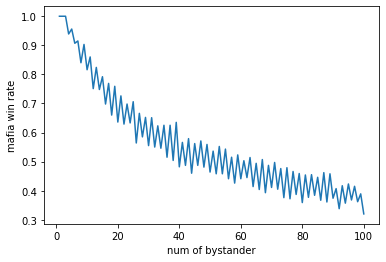

In [39]:
#마피아 수가 동일할 때, 시민 수에 따른 마피아의 승률 분포 그래프
bystander_list=[]

for i in range(1,101):
    bystander_list.append(i)
    
bystander_nlist=pd.Series(bystander_list)
mafia_rate=pd.Series(average_list)

fig,ax=plt.subplots()
ax.plot(bystander_nlist, mafia_rate)
ax.set_xlabel("num of bystander")
ax.set_ylabel("mafia win rate")

Text(0, 0.5, 'mafia win rate')

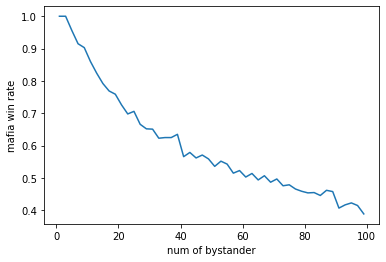

In [40]:
#마피아 수가 동일할 때, 시민 수에 따른 마피아의 승률 분포 그래프 (시민 수=홀수)
bystander_list=[]
step_average_list=[]

for i in range(1,101,2):
    bystander_list.append(i)
    step_average_list.append(average_list[i-1])
    
bystander_nlist_odd=pd.Series(bystander_list)
mafia_rate_odd=pd.Series(step_average_list)

fig,ax=plt.subplots()
ax.plot(bystander_nlist_odd, mafia_rate_odd)
ax.set_xlabel("num of bystander")
ax.set_ylabel("mafia win rate")

Text(0, 0.5, 'mafia win rate')

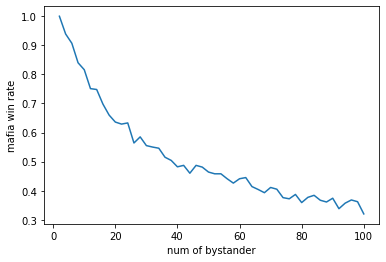

In [41]:
#마피아 수가 동일할 때, 시민 수에 따른 마피아의 승률 분포 그래프 (시민 수=짝수)
bystander_list=[]
step_average_list=[]

for i in range(2,101,2):
    bystander_list.append(i)
    step_average_list.append(average_list[i-1])
    
bystander_nlist_even=pd.Series(bystander_list)
mafia_rate_even=pd.Series(step_average_list)

fig,ax=plt.subplots()
ax.plot(bystander_nlist_even, mafia_rate_even)
ax.set_xlabel("num of bystander")
ax.set_ylabel("mafia win rate")

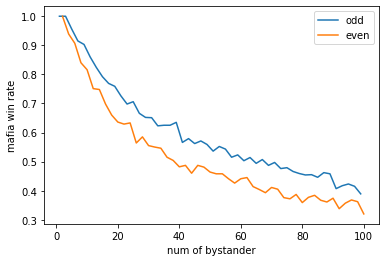

In [42]:
#마피아 수가 동일할 때, 시민 수에 따른 마피아의 승률 분포 그래프 (시민 수=짝수ver + 시민 수=홀수ver)
fig,ax=plt.subplots()
ax.plot(bystander_nlist_odd, mafia_rate_odd, label='odd')
ax.plot(bystander_nlist_even, mafia_rate_even, label='even')
ax.set_xlabel("num of bystander")
ax.set_ylabel("mafia win rate")
plt.legend()
plt.show()

In [43]:
#가장 단순한 마피아 게임(시민 수 고정, 마피아 수 변화하며 마피아의 승률 관찰)
mafia_num, bystander_num, cop_num, medic_num = 0, 0, 0, 0
mafia_win=0
bystander_win=0
average_list_mafia=[]
show_mafia=[]

for mafia in range(1,31):
    bystander_win=0
    mafia_win=0
    for repeat in range(1000):
        bystander_num=200
        mafia_num=mafia
        cop_num=0
        medic_num=0
        result=gameMain(False, False, 2) #경찰 기억X, 생존자 기억X, 마피아 발견 시 올려줄 가중치=2 
        if(result==1):
            bystander_win+=1
        elif(result==2):
            mafia_win+=1
    average=mafia_win/(bystander_win+mafia_win)
    average_list_mafia.append(average)
    show_mafia.append([str(mafia)+"명", average])
print(show_mafia)

[['1명', 0.077], ['2명', 0.202], ['3명', 0.24], ['4명', 0.386], ['5명', 0.382], ['6명', 0.519], ['7명', 0.491], ['8명', 0.635], ['9명', 0.607], ['10명', 0.725], ['11명', 0.676], ['12명', 0.809], ['13명', 0.77], ['14명', 0.863], ['15명', 0.803], ['16명', 0.879], ['17명', 0.869], ['18명', 0.924], ['19명', 0.908], ['20명', 0.953], ['21명', 0.931], ['22명', 0.961], ['23명', 0.946], ['24명', 0.986], ['25명', 0.962], ['26명', 0.986], ['27명', 0.966], ['28명', 0.989], ['29명', 0.983], ['30명', 0.994]]


Text(0, 0.5, 'mafia win rate')

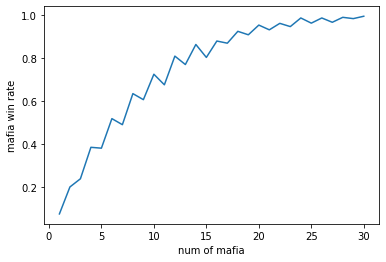

In [44]:
#시민 수가 동일할 때, 마피아 수에 따른 마피아의 승률 분포 그래프
mafia_list=[]

for i in range(1,31):
    mafia_list.append(i)
    
mafia_nlist=pd.Series(mafia_list)
mafia_ratem=pd.Series(average_list_mafia)

fig,ax=plt.subplots()
ax.plot(mafia_nlist, mafia_ratem)
ax.set_xlabel("num of mafia")
ax.set_ylabel("mafia win rate")

Text(0, 0.5, 'mafia win rate')

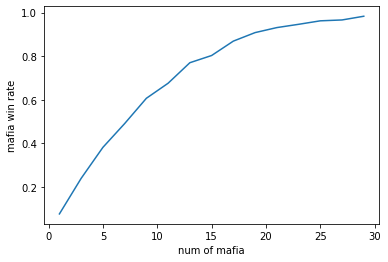

In [45]:
#시민 수가 동일할 때, 마피아 수에 따른 마피아의 승률 분포 그래프 (마피아 수=홀수)
mafia_list=[]

step_average_list=[]

for i in range(1,31,2):
    mafia_list.append(i)
    step_average_list.append(average_list_mafia[i-1])
    
mafia_nlist_odd=pd.Series(mafia_list)
mafia_ratem_odd=pd.Series(step_average_list)

fig,ax=plt.subplots()
ax.plot(mafia_nlist_odd, mafia_ratem_odd)
ax.set_xlabel("num of mafia")
ax.set_ylabel("mafia win rate")

Text(0, 0.5, 'mafia win rate')

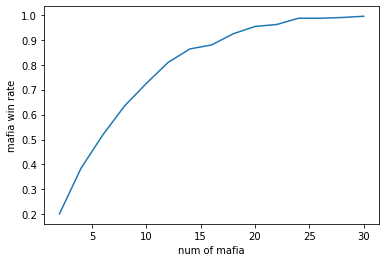

In [46]:
#시민 수가 동일할 때, 마피아 수에 따른 마피아의 승률 분포 그래프 (마피아 수=짝수)
mafia_list=[]

step_average_list=[]

for i in range(2,31,2):
    mafia_list.append(i)
    step_average_list.append(average_list_mafia[i-1])
    
mafia_nlist_even=pd.Series(mafia_list)
mafia_ratem_even=pd.Series(step_average_list)

fig,ax=plt.subplots()
ax.plot(mafia_nlist_even, mafia_ratem_even)
ax.set_xlabel("num of mafia")
ax.set_ylabel("mafia win rate")

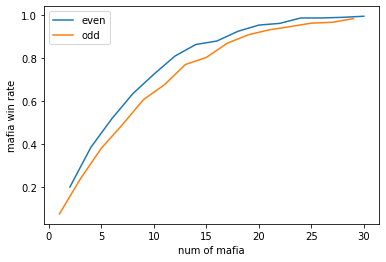

In [47]:
#시민 수가 동일할 때, 마피아 수에 따른 마피아의 승률 분포 그래프 (마피아 수=홀수ver + 마피아 수=짝수ver)
fig,ax=plt.subplots()
ax.plot(mafia_nlist_even, mafia_ratem_even, label='even')
ax.plot(mafia_nlist_odd, mafia_ratem_odd, label='odd')
ax.set_xlabel("num of mafia")
ax.set_ylabel("mafia win rate")

plt.legend()
plt.show()

In [48]:
#가장 단순한 게임에 기억력 나쁜 경찰 추가(마피아 수 고정, 시민 수 변화하며 마피아의 승률 관찰)
mafia_num, bystander_num, cop_num, medic_num = 0, 0, 0, 0
mafia_win=0
bystander_win=0
average_list2=[]
show2=[]

for bystander in range(3,101):
    bystander_win=0
    mafia_win=0
    for repeat in range(1000):
        bystander_num=bystander-3
        if(bystander_num<0):
            bystander_num=0
        mafia_num=3
        cop_num=3
        medic_num=0
        result=gameMain(False, False, 2) #경찰 기억X, 생존자 기억X, 마피아 발견 시 올려줄 가중치=2
        if(result==1):
            bystander_win+=1
        elif(result==2):
            mafia_win+=1
    average=mafia_win/(bystander_win+mafia_win)
    average_list2.append(average)
    show2.append([str(bystander)+"명", average])
print(show2)

[['3명', 1.0], ['4명', 0.906], ['5명', 0.946], ['6명', 0.839], ['7명', 0.897], ['8명', 0.766], ['9명', 0.88], ['10명', 0.734], ['11명', 0.808], ['12명', 0.704], ['13명', 0.797], ['14명', 0.669], ['15명', 0.766], ['16명', 0.642], ['17명', 0.759], ['18명', 0.644], ['19명', 0.724], ['20명', 0.608], ['21명', 0.704], ['22명', 0.573], ['23명', 0.676], ['24명', 0.564], ['25명', 0.659], ['26명', 0.563], ['27명', 0.665], ['28명', 0.54], ['29명', 0.645], ['30명', 0.575], ['31명', 0.605], ['32명', 0.486], ['33명', 0.615], ['34명', 0.486], ['35명', 0.592], ['36명', 0.492], ['37명', 0.583], ['38명', 0.458], ['39명', 0.548], ['40명', 0.44], ['41명', 0.545], ['42명', 0.469], ['43명', 0.546], ['44명', 0.462], ['45명', 0.528], ['46명', 0.457], ['47명', 0.55], ['48명', 0.449], ['49명', 0.557], ['50명', 0.433], ['51명', 0.506], ['52명', 0.431], ['53명', 0.508], ['54명', 0.401], ['55명', 0.514], ['56명', 0.429], ['57명', 0.489], ['58명', 0.412], ['59명', 0.469], ['60명', 0.373], ['61명', 0.478], ['62명', 0.41], ['63명', 0.496], ['64명', 0.38], ['65명', 0.43], ['66명',

In [49]:
#기억력이 나쁜 경찰이 추가되었을 때, 1-1실험의 마피아의 승률 DataFrame
df3=pd.DataFrame(show2,columns=['시민의 수', '마피아의 평균 승률'])
df3

,시민의 수,마피아의 평균 승률
0,3명,1.000
1,4명,0.906
2,5명,0.946
3,6명,0.839
4,7명,0.897
...,...,...
93,96명,0.346
94,97명,0.376
95,98명,0.326
96,99명,0.392


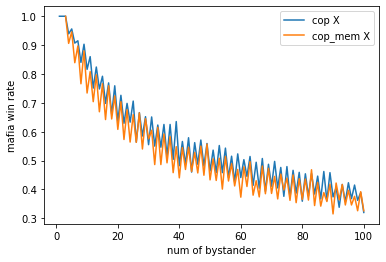

In [50]:
#기억력이 나쁜 경찰이 추가되었을 때, 1-1실험의 마피아의 승률 분포 그래프
bystander_list2=[]
for i in range(3,101):
    bystander_list2.append(i)
bystander_nlist2=pd.Series(bystander_list2)
mafia_rate2=pd.Series(average_list2)

fig,ax=plt.subplots()
ax.plot(bystander_nlist, mafia_rate, label='cop X')
ax.plot(bystander_nlist2, mafia_rate2, label='cop_mem X')
ax.set_xlabel("num of bystander")
ax.set_ylabel("mafia win rate")

plt.legend()
plt.show()

In [51]:
#가장 단순한 게임에 기억력 좋은 경찰 추가(마피아 수 고정, 시민 수 변화하며 마피아의 승률 관찰)
mafia_num, bystander_num, cop_num, medic_num = 0, 0, 0, 0
mafia_win=0
bystander_win=0
average_list3=[]
show3=[]

for bystander in range(3,101):
    bystander_win=0
    mafia_win=0
    for repeat in range(1000):
        bystander_num=bystander-3
        if(bystander_num<0):
            bystander_num=0
        mafia_num=3
        cop_num=3
        medic_num=0
        result=gameMain(True, False, 2) #경찰 기억O, 생존자 기억X, 마피아 발견 시 올려줄 가중치=2
        if(result==1):
            bystander_win+=1
        elif(result==2):
            mafia_win+=1
    average=mafia_win/(bystander_win+mafia_win)
    average_list3.append(average)
    show3.append([str(bystander)+"명", average])
print(show3)

[['3명', 1.0], ['4명', 0.903], ['5명', 0.946], ['6명', 0.805], ['7명', 0.877], ['8명', 0.718], ['9명', 0.82], ['10명', 0.661], ['11명', 0.768], ['12명', 0.606], ['13명', 0.728], ['14명', 0.555], ['15명', 0.694], ['16명', 0.571], ['17명', 0.67], ['18명', 0.541], ['19명', 0.607], ['20명', 0.521], ['21명', 0.615], ['22명', 0.504], ['23명', 0.574], ['24명', 0.49], ['25명', 0.574], ['26명', 0.458], ['27명', 0.581], ['28명', 0.447], ['29명', 0.518], ['30명', 0.444], ['31명', 0.519], ['32명', 0.426], ['33명', 0.493], ['34명', 0.392], ['35명', 0.506], ['36명', 0.405], ['37명', 0.461], ['38명', 0.399], ['39명', 0.463], ['40명', 0.379], ['41명', 0.444], ['42명', 0.349], ['43명', 0.451], ['44명', 0.369], ['45명', 0.417], ['46명', 0.385], ['47명', 0.404], ['48명', 0.326], ['49명', 0.429], ['50명', 0.342], ['51명', 0.414], ['52명', 0.334], ['53명', 0.405], ['54명', 0.318], ['55명', 0.404], ['56명', 0.3], ['57명', 0.382], ['58명', 0.303], ['59명', 0.393], ['60명', 0.305], ['61명', 0.389], ['62명', 0.31], ['63명', 0.336], ['64명', 0.309], ['65명', 0.376], ['66명'

In [52]:
#기억력이 좋은 경찰이 추가되었을 때, 1-1실험의 마피아의 승률 DataFrame
df4=pd.DataFrame(show3,columns=['시민의 수', '마피아의 평균 승률'])
df4

,시민의 수,마피아의 평균 승률
0,3명,1.000
1,4명,0.903
2,5명,0.946
3,6명,0.805
4,7명,0.877
...,...,...
93,96명,0.269
94,97명,0.285
95,98명,0.239
96,99명,0.307


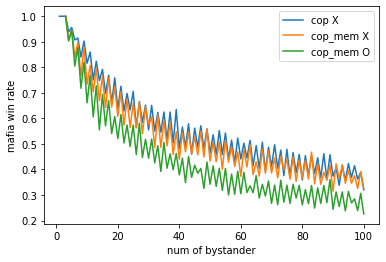

In [53]:
#기억력이 좋은 경찰이 추가되었을 때, 1-1실험의 마피아의 승률 분포 그래프
bystander_list3=[]
for i in range(3,101):
    bystander_list3.append(i)
bystander_nlist3=pd.Series(bystander_list3)
mafia_rate3=pd.Series(average_list3)

fig,ax=plt.subplots()
ax.plot(bystander_nlist, mafia_rate, label='cop X')
ax.plot(bystander_nlist2, mafia_rate2, label='cop_mem X')
ax.plot(bystander_nlist3, mafia_rate3, label='cop_mem O')
ax.set_xlabel("num of bystander")
ax.set_ylabel("mafia win rate")

plt.legend()
plt.show()

In [54]:
#가장 단순한 게임에 메딕 추가(마피아 수 고정, 시민 수 변화하며 마피아의 승률 관찰)
mafia_num, bystander_num, cop_num, medic_num = 0, 0, 0, 0
mafia_win=0
bystander_win=0
average_list_medic=[]
show_medic=[]

for bystander in range(3,101):
    bystander_win=0
    mafia_win=0
    for repeat in range(1000):
        bystander_num=bystander-3
        if(bystander_num<0):
            bystander_num=0
        mafia_num=3
        cop_num=0
        medic_num=3
        result=gameMain(False, False, 2) #경찰 기억X, 생존자 기억X, 마피아 발견 시 올려줄 가중치=2
        if(result==1):
            bystander_win+=1
        elif(result==2):
            mafia_win+=1
    average=mafia_win/(bystander_win+mafia_win)
    average_list_medic.append(average)
    show_medic.append([str(bystander)+"명", average])
print(show_medic)

[['3명', 1.0], ['4명', 0.949], ['5명', 0.956], ['6명', 0.895], ['7명', 0.887], ['8명', 0.838], ['9명', 0.849], ['10명', 0.792], ['11명', 0.798], ['12명', 0.769], ['13명', 0.799], ['14명', 0.738], ['15명', 0.74], ['16명', 0.697], ['17명', 0.72], ['18명', 0.691], ['19명', 0.691], ['20명', 0.665], ['21명', 0.691], ['22명', 0.636], ['23명', 0.66], ['24명', 0.584], ['25명', 0.643], ['26명', 0.593], ['27명', 0.609], ['28명', 0.6], ['29명', 0.633], ['30명', 0.587], ['31명', 0.577], ['32명', 0.586], ['33명', 0.574], ['34명', 0.568], ['35명', 0.577], ['36명', 0.536], ['37명', 0.551], ['38명', 0.534], ['39명', 0.532], ['40명', 0.506], ['41명', 0.531], ['42명', 0.526], ['43명', 0.548], ['44명', 0.503], ['45명', 0.513], ['46명', 0.488], ['47명', 0.523], ['48명', 0.455], ['49명', 0.513], ['50명', 0.476], ['51명', 0.51], ['52명', 0.471], ['53명', 0.492], ['54명', 0.467], ['55명', 0.47], ['56명', 0.439], ['57명', 0.458], ['58명', 0.459], ['59명', 0.467], ['60명', 0.431], ['61명', 0.474], ['62명', 0.445], ['63명', 0.409], ['64명', 0.446], ['65명', 0.443], ['66명',

In [55]:
#메딕이 추가되었을 때, 1-1실험의 마피아의 승률 DataFrame
df_medic=pd.DataFrame(show_medic,columns=['시민의 수', '마피아의 평균 승률'])
df_medic

,시민의 수,마피아의 평균 승률
0,3명,1.000
1,4명,0.949
2,5명,0.956
3,6명,0.895
4,7명,0.887
...,...,...
93,96명,0.368
94,97명,0.399
95,98명,0.354
96,99명,0.400


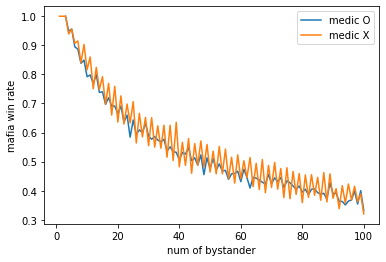

In [56]:
#메딕이 추가되었을 때, 1-1실험의 마피아의 승률 분포 그래프
bystander_list_medic=[]

for i in range(3,101):
    bystander_list_medic.append(i)
    
bystander_nlist_medic=pd.Series(bystander_list_medic)
mafia_rate_medic=pd.Series(average_list_medic)

fig,ax=plt.subplots()
ax.plot(bystander_nlist_medic, mafia_rate_medic,label='medic O')
ax.plot(bystander_nlist, mafia_rate, label='medic X')
ax.set_xlabel("num of bystander")
ax.set_ylabel("mafia win rate")

plt.legend()
plt.show()

In [57]:
#가장 단순한 게임에 기억력 나쁜 경찰, 메딕 추가(마피아 수 고정, 시민 수 변화하며 마피아의 승률 관찰)
mafia_num, bystander_num, cop_num, medic_num = 0, 0, 0, 0
mafia_win=0
bystander_win=0
average_list_all=[]
show_all=[]

for bystander in range(6,101):
    bystander_win=0
    mafia_win=0
    for repeat in range(1000):
        bystander_num=bystander-6
        if(bystander_num<0):
            bystander_num=0
        mafia_num=3
        cop_num=3
        medic_num=3
        result=gameMain(False, False, 2) #경찰 기억X, 생존자 기억X, 마피아 발견 시 올려줄 가중치=2
        if(result==1):
            bystander_win+=1
        elif(result==2):
            mafia_win+=1
    average=mafia_win/(bystander_win+mafia_win)
    average_list_all.append(average)
    show_all.append([str(bystander)+"명", average])
print(show_all)

[['6명', 0.832], ['7명', 0.853], ['8명', 0.793], ['9명', 0.787], ['10명', 0.757], ['11명', 0.761], ['12명', 0.694], ['13명', 0.745], ['14명', 0.709], ['15명', 0.699], ['16명', 0.652], ['17명', 0.661], ['18명', 0.648], ['19명', 0.649], ['20명', 0.579], ['21명', 0.658], ['22명', 0.604], ['23명', 0.601], ['24명', 0.614], ['25명', 0.6], ['26명', 0.575], ['27명', 0.584], ['28명', 0.547], ['29명', 0.582], ['30명', 0.544], ['31명', 0.56], ['32명', 0.489], ['33명', 0.593], ['34명', 0.485], ['35명', 0.53], ['36명', 0.491], ['37명', 0.532], ['38명', 0.492], ['39명', 0.538], ['40명', 0.497], ['41명', 0.506], ['42명', 0.495], ['43명', 0.532], ['44명', 0.46], ['45명', 0.475], ['46명', 0.461], ['47명', 0.502], ['48명', 0.474], ['49명', 0.496], ['50명', 0.475], ['51명', 0.494], ['52명', 0.474], ['53명', 0.488], ['54명', 0.417], ['55명', 0.487], ['56명', 0.439], ['57명', 0.445], ['58명', 0.425], ['59명', 0.47], ['60명', 0.447], ['61명', 0.427], ['62명', 0.419], ['63명', 0.432], ['64명', 0.401], ['65명', 0.44], ['66명', 0.434], ['67명', 0.442], ['68명', 0.422], ['

In [58]:
#기억력 나쁜 경찰과 메딕이 추가되었을 때, 1-1실험의 마피아의 승률 DataFrame
df_all=pd.DataFrame(show_all,columns=['시민의 수', '마피아의 평균 승률'])
df_all

,시민의 수,마피아의 평균 승률
0,6명,0.832
1,7명,0.853
2,8명,0.793
3,9명,0.787
4,10명,0.757
...,...,...
90,96명,0.342
91,97명,0.378
92,98명,0.353
93,99명,0.363


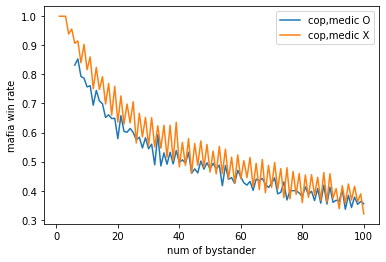

In [59]:
#기억력 나쁜 경찰과 메딕이 추가되었을 때, 1-1실험의 마피아의 승률 분포 그래프
bystander_list_all=[]

for i in range(6,101):
    bystander_list_all.append(i)
    
bystander_nlist_all=pd.Series(bystander_list_all)
mafia_rate_all=pd.Series(average_list_all)

fig,ax=plt.subplots()
ax.plot(bystander_nlist_all, mafia_rate_all,label='cop,medic O')
ax.plot(bystander_nlist, mafia_rate, label='cop,medic X')
ax.set_xlabel("num of bystander")
ax.set_ylabel("mafia win rate")

plt.legend()
plt.show()

In [60]:
#가장 단순한 게임에 기억력 좋은 경찰, 메딕 추가(마피아 수 고정, 시민 수 변화하며 마피아의 승률 관찰)
mafia_num, bystander_num, cop_num, medic_num = 0, 0, 0, 0
mafia_win=0
bystander_win=0
average_list_all2=[]
show_all2=[]

for bystander in range(6,101):
    bystander_win=0
    mafia_win=0
    for repeat in range(1000):
        bystander_num=bystander-6
        if(bystander_num<0):
            bystander_num=0
        mafia_num=3
        cop_num=3
        medic_num=3
        result=gameMain(True, False, 2) #경찰 기억O, 생존자 기억X, 마피아 발견 시 올려줄 가중치=2
        if(result==1):
            bystander_win+=1
        elif(result==2):
            mafia_win+=1
    average=mafia_win/(bystander_win+mafia_win)
    average_list_all2.append(average)
    show_all2.append([str(bystander)+"명", average])
print(show_all2)

[['6명', 0.807], ['7명', 0.819], ['8명', 0.762], ['9명', 0.759], ['10명', 0.698], ['11명', 0.709], ['12명', 0.644], ['13명', 0.678], ['14명', 0.594], ['15명', 0.603], ['16명', 0.555], ['17명', 0.58], ['18명', 0.55], ['19명', 0.534], ['20명', 0.498], ['21명', 0.54], ['22명', 0.504], ['23명', 0.508], ['24명', 0.497], ['25명', 0.477], ['26명', 0.479], ['27명', 0.465], ['28명', 0.453], ['29명', 0.491], ['30명', 0.4], ['31명', 0.456], ['32명', 0.433], ['33명', 0.46], ['34명', 0.421], ['35명', 0.407], ['36명', 0.399], ['37명', 0.402], ['38명', 0.436], ['39명', 0.405], ['40명', 0.398], ['41명', 0.377], ['42명', 0.39], ['43명', 0.406], ['44명', 0.374], ['45명', 0.383], ['46명', 0.363], ['47명', 0.398], ['48명', 0.364], ['49명', 0.373], ['50명', 0.357], ['51명', 0.402], ['52명', 0.316], ['53명', 0.375], ['54명', 0.364], ['55명', 0.388], ['56명', 0.325], ['57명', 0.36], ['58명', 0.321], ['59명', 0.338], ['60명', 0.302], ['61명', 0.345], ['62명', 0.342], ['63명', 0.337], ['64명', 0.315], ['65명', 0.332], ['66명', 0.309], ['67명', 0.33], ['68명', 0.289], ['69

In [61]:
#기억력 좋은 경찰과 메딕이 추가되었을 때, 1-1실험의 마피아의 승률 DataFrame
df_all2=pd.DataFrame(show_all2,columns=['시민의 수', '마피아의 평균 승률'])
df_all2

,시민의 수,마피아의 평균 승률
0,6명,0.807
1,7명,0.819
2,8명,0.762
3,9명,0.759
4,10명,0.698
...,...,...
90,96명,0.270
91,97명,0.254
92,98명,0.256
93,99명,0.256


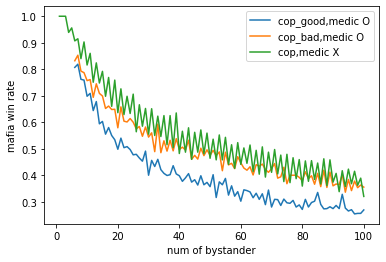

In [62]:
#기억력 좋은 경찰과 메딕이 추가되었을 때, 1-1실험의 마피아의 승률 분포 그래프
bystander_list_all2=[]

for i in range(6,101):
    bystander_list_all2.append(i)
    
bystander_nlist_all2=pd.Series(bystander_list_all2)
mafia_rate_all2=pd.Series(average_list_all2)

fig,ax=plt.subplots()
ax.plot(bystander_nlist_all2, mafia_rate_all2,label='cop_good,medic O')
ax.plot(bystander_nlist_all, mafia_rate_all,label='cop_bad,medic O')
ax.plot(bystander_nlist, mafia_rate, label='cop,medic X')
ax.set_xlabel("num of bystander")
ax.set_ylabel("mafia win rate")

plt.legend()
plt.show()